In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])
df.head()

,A,B,C
2016-07-01 00:00:00,0.864308,0.157764,-0.632256
2016-07-01 00:00:01,-0.691822,0.586360,-0.263197
2016-07-01 00:00:02,-2.009079,-0.267242,0.519543
2016-07-01 00:00:03,-0.981303,-1.173512,1.417951
2016-07-01 00:00:04,0.485571,0.434594,-1.377393


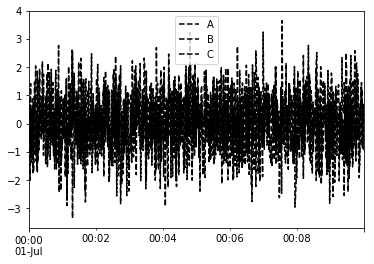

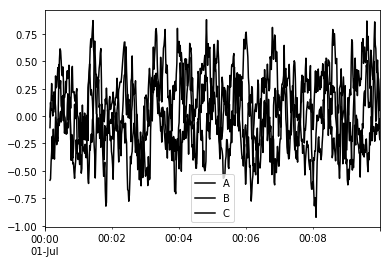

In [4]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [5]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  


,A,B,C
2016-07-01 00:00:01,0.034372,0.386348,-0.435425
2016-07-01 00:00:02,-0.739479,0.138835,-0.073780
2016-07-01 00:00:03,-0.812526,-0.257579,0.376819
2016-07-01 00:00:04,-0.479401,-0.079950,-0.073356
2016-07-01 00:00:05,-0.559999,-0.295643,-0.117383
2016-07-01 00:00:06,-0.326951,-0.055950,-0.093857
2016-07-01 00:00:07,-0.289373,0.122408,-0.406990
2016-07-01 00:00:08,-0.545028,0.195716,-0.202318
2016-07-01 00:00:09,-0.691973,-0.019337,-0.075768


In [8]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [9]:
df.head()

,A,B,C,D
2016-06-06,1.999992,-0.666055,-1.717892,-0.186634
2016-06-07,0.114994,0.290978,-0.618406,0.379828
2016-06-08,0.634201,0.995225,-1.171654,-1.252707
2016-06-09,-0.069831,-1.461928,0.363816,0.895188
2016-06-10,1.721246,0.938106,1.434047,-1.053320


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D05C1E8978>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001D05C257240>], dtype=object)

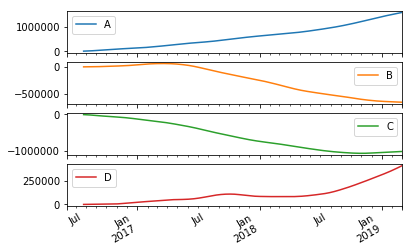

In [11]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [12]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,11.670760,1.008446,4.101945,0.685975


In [13]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,3.057485,-0.853594,-2.886041,-0.090037
2016-06-08,4.326378,-0.709390,-4.444742,-0.411009
2016-06-09,5.630663,-0.847734,-6.010126,-0.612576
2016-06-10,7.293355,-0.911474,-7.291374,-0.977045


In [14]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

In [15]:
# EWMA
# Why use EWMA?

In [16]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [17]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting